In [32]:
############ set-width of the notebook ###############################
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [33]:
from IPython.display import display, IFrame

# Replace 'yourfile.pdf' with the path to your PDF file
file_path = 'theory.pdf'

# Display the PDF
display(IFrame(file_path, width=800, height=600))

In [34]:
############ import libraries ###############################
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

# %matplotlib inline

#### 2D heat equation/2D PDE solver
For heat equation, $$ \begin{equation}
\frac{\partial{u}}{\partial{t}}=\alpha\left(\frac{\partial^2{u}}{\partial{x^2}}+\frac{\partial^2{u}}{\partial{y^2}}\right)
\end{equation},
$$
the maximum value allowed for the solution to be stable is $\Delta t < \Delta t_{max}=\frac{\Delta x^2}{4 \alpha} $. Exactly similar to the 1D case except the addition of second order diff along y axis.

In [35]:
#############################################################
# coefficients
alpha = 2

# x-axis details
xlen = 1
nx = 80*3
x = np.linspace(0, xlen, nx)
dx = x[1] - x[0]

# y-axis details
ylen = 2
ny = 40*3
y = np.linspace(0, ylen, ny)
dy = y[1] - y[0]

# create mesgrid
X, Y = np.meshgrid(x,y)

# time-axis details: define max_iter_time
nt = 300

# condition for stability
dt_max = (dx ** 2)/(4 * alpha) 

# the value of time-step used in this code
dt = dt_max/2

# coefficent in front of the space variation
gamma = (alpha * dt) / (dx ** 2)

# print some parameters
print(f"dt = {round(dt, 4)}, dt_max = {round(dt_max, 4)}, dt_max/dt = {round(dt_max/dt, 1)}")

dt = 0.0, dt_max = 0.0, dt_max/dt = 2.0


In [36]:
X.shape

(120, 240)

In [37]:
###################################################################################################################
# make an emtry matrix in 2D. We visualize the matrix in a way such that the rows are stacked along y-axis 
u = np.empty(( ny, nx))

# ********** Set the initial condition **********

# initialize u
for i in range(nx):
    for j in range( ny):
        u[j, i] = np.cos(j*dy) + np.sin(i*dx)

# Boundary conditions; Note: 1st arg of u is row (i.e. y values) and 2nd is col
u[:, 0] = 100 # left
u[:, -1] = 0 # right
u[0, :] = 0 # bottom
u[-1, :] = 100 # top

In [38]:
# u, u.shape

In [39]:
############################# Func: define PDE ###########################################
def calculate(u):
    for k in range(0, nt, 1):
        for i in range(1, nx-1, 1):
            for j in range(1, ny-1, 1):
                uxx = u[j, i+1] + u[j, i-1] - 2*u[j, i]
                uyy = u[j+1, i] + u[j-1, i] - 2*u[j, i]
                tmp = u[j, i] + gamma * (uxx + uyy) 
                u[j, i] = tmp
    return u

def plotheatmap(u_k, k):
    plt.clf()
    plt.title(f"Temperature at t = {k*delt:.3f} unit time")
    plt.xlabel("x")
    plt.ylabel("y")
    # This is to plot u_k (u at time-step k)
    plt.pcolormesh(u_k, cmap=plt.cm.jet, vmin=0, vmax=100)
    plt.colorbar()

#     return pltdefine PDE

In [40]:
# Do the calculation here (Solve PDE!)
u = calculate(u)

In [41]:
u.shape

(120, 240)

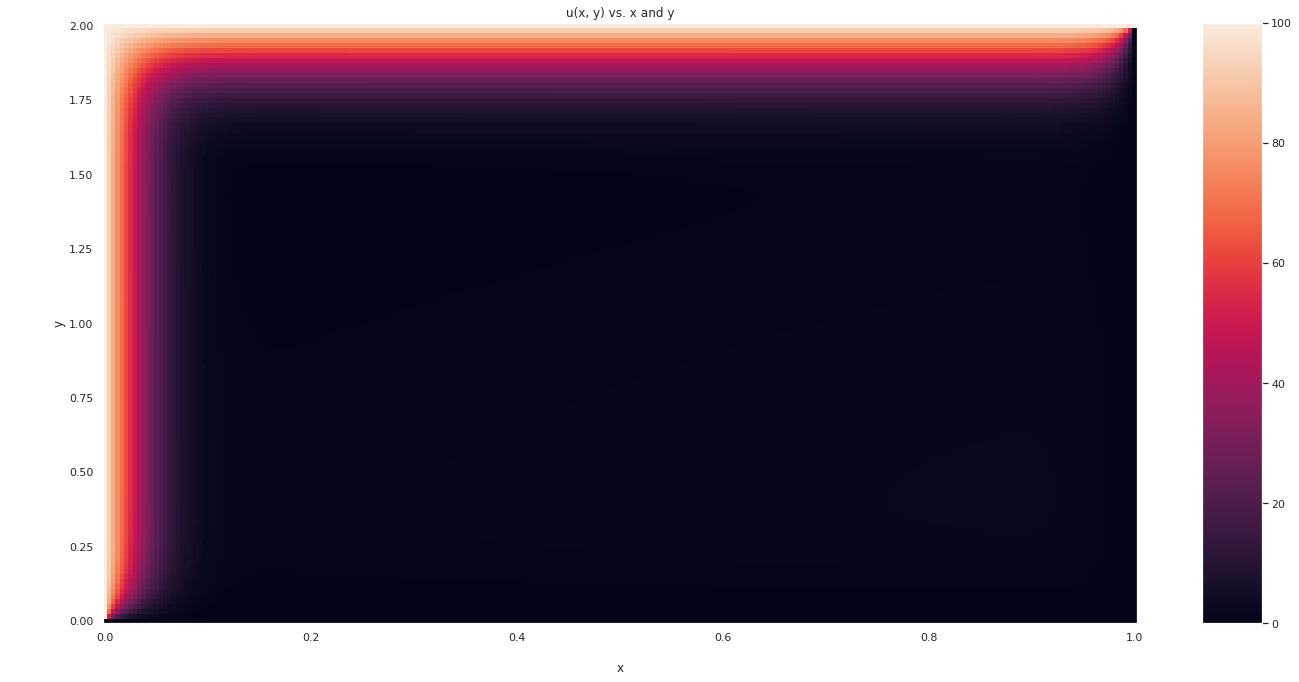

In [42]:
########################### density plot ###########################################################
from matplotlib import pyplot as plt, cm, colors
import numpy as np
sns.set()

# Creating figure and fig-properties
fig = plt.figure(figsize =(20, 10))
ax = plt.axes()
plt.rcParams["figure.autolayout"] = True
plt.rcParams["font.size"] = '24'
 
# Creating color map
my_cmap = plt.get_cmap('hot')

# Creating dataset
Xgrid = X; Ygrid = Y

# Creating plot and colorbar
surf = plt.pcolormesh(Xgrid, Ygrid, u, shading='auto')
fig.colorbar(surf, ax = ax, shrink = 1.0, aspect = 10)

ax.set_title('u(x, y) vs. x and y')
ax.set_xlabel("\nx")
ax.set_ylabel("\n\n\ny")

##### plt.savefig('temperature_density_plot_2D.png',facecolor="w", transparent=True, dpi=300)
plt.show()